# **NLP Course Work**
Made By Abdullah Khalid F220102

## Note:
Please ignore if you see some silly mistake. I was really sick throughout the duration of this module.

## Pipeline:
In the following notebook we are doing an array of things. Starting from Importing everything, then we preprocess the data that is then followed by applying Latent Semantic Indexing (LSI) and tuning it. Then we move on to Neural information retrieval from there we go to  Topic modelling and visualisation of search results and lastly we go to Summarisation of search results.

# TASK 1:
## Pre-process the dataset.

In [55]:
from google.colab import drive  # First, mount the Google Drive to Colab Notebook
drive.mount("/content/drive")
!ls "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"  # Access the Dataset folder inside the Google Drive
Data_path = "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"   #Set the filename to the csv file path in the Dataset folder
filename=str('/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/JewelleryReviewsLSA.csv')
#### Import required libraries ####
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from pandas import DataFrame
from matplotlib import pyplot
import random
import nltk
import numpy
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import rand
from sklearn.metrics.pairwise import cosine_similarity
from numpy import argsort
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from collections import Counter
import csv
import pandas as pd
#### Library Import end ####

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
JewelleryReviewsLSA.csv		     JewelleryReviewsSummarisationTargets.csv
JewelleryReviewsQueryRelevantID.csv


In [56]:
## Note: This codeblock is mostly copied from Lab.
nltk.download('stopwords')  # Download stopwaords

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	"""
	add_doc_to_vocab function takes a filename and a vocabulary (as a Counter object) as inputs.
	The function loads the text from the specified file, cleans it by applying the clean_doc function,
	and updates the count of each token in the vocabulary using the update() method of Counter object.

	:param filename: a string specifying the path to the file to be loaded
	:param vocab: a Counter object containing the vocabulary of tokens and their counts
	"""
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)
 
 # load doc into memory
def load_doc(filename):
	"""
	load_doc function takes a filename as input, opens the file in read-only mode,
	reads the entire content of the file and returns it as a string. Finally, it closes the file.

	:param filename: a string specifying the path to the file to be loaded
	:return: a string containing the entire content of the specified file
	"""
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# save list to file
def save_list(lines, filename):
	"""
	save_list function takes a list of strings and a filename as inputs. The function
	joins the lines into a single string separated by newline characters, opens the file
	in write mode, writes the string to the file, and finally closes the file.

	:param lines: a list of strings to be saved to the file
	:param filename: a string specifying the path to the file to be created/overwritten
	"""
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# split train and test
def random_sample(num1, num2):
		"""
		random_sample function randomly samples num2 indices from a list of num1 integers
		and returns two lists: TrainIndex containing the sampled indices and TestIndex containing
		the remaining indices. The function uses random.uniform() to generate random indices
		and deletes them from the list to avoid duplicates.
		:param num1: an integer specifying the size of the initial list of integers
		:param num2: an integer specifying the number of indices to sample from the list
		:return: a tuple containing two lists: TrainIndex containing sampled indices and TestIndex
		containing remaining indices.
		"""
		dataList = list(range(num1))                           
		TrainIndex = []                                        
		for i in range(num2):                                 
				randIndex = int(random.uniform(0,len(dataList))) 
				TrainIndex.append(dataList[randIndex])            
				del(dataList[randIndex])                         
		TestIndex = dataList                              
		return TrainIndex,TestIndex  

# load doc into memory
def load_doc_lines(filename):
	 """
		load_doc_lines function takes a filename as input, opens the file in read-only mode,
		reads the entire content of the file line by line, strips any newline characters at the
		end of each line, appends the line to a list of lines, and finally closes the file.

		:param filename: a string specifying the path to the file to be loaded
		:return: a list of strings where each string is a line from the file
	 """
	 file = open(filename,'rt')
	 lines = list()
   # read all text as lines
	 while 1:

		 line = file.readline()   
		 if not line:    
		   break
		 pass
		 lines.append(line.strip("\n"))  
   # close the file
	 file.close()
	 return lines

# turn a doc into clean tokens
def clean_doc(doc):
	"""
	clean_doc function takes a document as input, tokenizes it by splitting on white space,
	converts the tokens to lower case, applies stemming using Porter Stemmer algorithm, removes
	punctuation from each token, removes any non-alphabetic tokens, removes stop words from the
	tokens, and removes tokens with a length of 1 character. The function returns the cleaned
	tokens as a list.

	:param doc: a string containing the document to be cleaned
	:return: a list of cleaned tokens
	"""
	# split into tokens by white space
	tokens = doc.split()
 
	# convert to lower case
	tokens = [word.lower() for word in tokens]

 	# stemming of words
	from nltk.stem.porter import PorterStemmer
	porter = PorterStemmer()
	tokens = [porter.stem(word) for word in tokens]

	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc, clean and return line of tokens
def doc_to_line(doc):
	"""
	doc_to_line function takes a document as input, cleans it using the clean_doc function,
	filters the resulting tokens by vocabulary (which is not implemented in the current code),
	and finally joins the remaining tokens into a single string separated by a space character.

	:param doc: a string containing the document to be processed
	:return: a string containing cleaned and filtered tokens joined by a space character
	"""
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	# tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

# load all docs in a directory
def process_docs(files):
	"""
	process_docs function takes a list of filenames as input. It iterates over each filename
	in the list, applies doc_to_line function to convert each document to a string of cleaned
	tokens, and appends the resulting string to a list of lines. The function then returns
	the list of lines containing cleaned and filtered tokens for all documents in the input.

	:param files: a list of strings containing filenames of documents to be processed
	:return: a list of strings containing cleaned and filtered tokens for all documents
	"""
	lines = list()
	# walk through all files in the folder
	for doc in files:
		# print(len(doc))
		line = doc_to_line(doc)
		# add to list
		lines.append(line)
	return lines



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TASK 2:
## Latent Semantic Indexing (LSI)
### Develop a Latent Semantic Indexing (LSI) model. Develop functionality such that for each query, the LSI model retrieves the top 10 most similar reviews from the dataset. (5 marks)

In [57]:
# prepare words encoding of docs
def prepare_data(train_docs, mode, vocab):
	# encode training data set
	vectorizer = CountVectorizer(vocabulary=vocab)
	transformer = TfidfTransformer(norm='l2')
	Xtrain = transformer.fit_transform(vectorizer.fit_transform(train_docs))
	return Xtrain

# load the dataset #########################################
ArRe_train_lines = load_doc_lines(Data_path + 'JewelleryReviewsLSA.csv')

train_docs = process_docs(ArRe_train_lines)    ## WE WILL BE USING THIS VARIABLE ALOTTT

# generate vocabulary
vocab = []
for ll in train_docs:
  tt = ll.split()
  for ww in tt:
    if ww not in vocab:
      vocab.append(ww)

# First, prepare the training data using the prepare_data function with 'tfidf' method and given vocabulary
Xtrain = prepare_data(train_docs, 'tfidf', vocab)
# Create an instance of TruncatedSVD model with 30 components and fit it to the training data
trunc_SVD_model = TruncatedSVD(n_components=50)
approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)
# Print the shape of the approximated Xtrain
print("Approximated Xtrain shape: " + str(approx_Xtrain.shape))

Approximated Xtrain shape: (204, 50)


In [58]:
# Load the CSV file 'JewelleryReviewsLSA.csv' from the Dataset folder in Google Drive into a pandas DataFrame object 'df'
df = pd.read_csv(Data_path +'JewelleryReviewsLSA.csv')

### Query Processing

In [59]:

# specify the CSV file name
csv_file  = Data_path + "JewelleryReviewsQueryRelevantID.csv"

column_names = ['Query1Text', 'Query2Text', 'Query3Text', 'Query4Text','Query5Text', 'Query6Text', 'Query7Text','Query8Text']

# create an empty list to store the data
Query = []

# open the CSV file and read its contents
with open(csv_file, 'r') as file:
    # create a CSV reader object
    reader = csv.DictReader(file)
    # retrieve the first row of the CSV file
    first_row = next(reader)
    # loop through the column names and retrieve the corresponding data
    for column_name in column_names:
        Query.append(first_row[column_name])


In [60]:
# preprocess query
def preprocess_query(review, mode, vocab):
    """
    This function preprocesses a Query  by cleaning it, converting it to a line, encoding it using the given vocabulary 
    and mode, and returning the encoded matrix.
    
    Args:
    Query (str): The Query to be preprocessed
    mode (str): The mode used for encoding. Can be either 'l1' or 'l2'
    vocab (list): The vocabulary used for encoding
    
    Returns:
    encoded (scipy.sparse.csr_matrix): The encoded matrix of the Query
    """
    # clean
    tokens = clean_doc(review)
    # convert to line
    line = ' '.join(tokens)
    # encode
    vectorizer = TfidfVectorizer(vocabulary=vocab)
    transformer = TfidfTransformer(norm='l2')
    encoded = transformer.fit_transform(vectorizer.fit_transform([line]))
    return encoded

top_indexes=[]   # Empty array for indexes
indexestemp=[]

for query in Query:     # Go through each query
  # retrieval
  encoded_query = preprocess_query(query, 'tfidf', vocab)
  
  transformed_query = trunc_SVD_model.transform(encoded_query)  # Fit the encoded query

  similarities = cosine_similarity(approx_Xtrain, transformed_query)  # Find the similarity

  Top_n_reviews=10  # We are taking only top 10 reviews
  
  indexes = np.argsort(similarities.flat)[::-1]   # Flaten the similarity table

  top_indexes=[]
  for i in range(Top_n_reviews):    # extract top 10 and put them in a array so that we get the output we have
    top_indexes.append(indexes[i])
  indexestemp.append(top_indexes)
indexestemp # Just to show how everything looks


[[105, 107, 118, 112, 115, 111, 113, 108, 104, 109],
 [121, 123, 122, 120, 125, 124, 6, 101, 99, 185],
 [98, 110, 97, 96, 134, 154, 131, 137, 126, 127],
 [143, 152, 141, 142, 29, 146, 144, 149, 148, 8],
 [158, 7, 154, 155, 156, 135, 43, 99, 137, 100],
 [160, 159, 161, 162, 170, 183, 165, 166, 187, 102],
 [171, 174, 173, 1, 176, 182, 40, 189, 180, 184],
 [185, 194, 186, 188, 189, 190, 187, 183, 191, 177]]

Now that we have all the indexes we need to convert them into IDs so that we can match it with the query IDs.

In [61]:
def index2ID(indexestemp):
  """
    Takes in a 2D list of index values and converts them to their corresponding IDs from a pandas DataFrame.

    Args:
    indexestemp (list): A 2D list of index values.

    Returns:
    list: A 2D list of corresponding IDs from a pandas DataFrame.

    Example:
    Suppose we have a 2D list of index values:
    [[1, 3, 5],
     [2, 4, 6]]
    This function would return a 2D list of corresponding IDs:
    [['ID_1', 'ID_3', 'ID_5'],
     ['ID_2', 'ID_4', 'ID_6']]
    """
  queryValstemp=[]

  for Q in range(len(Query)):  #  Iterate through each query in the list of queries
    queryVals=[]

    for i in range(len(top_indexes)): # Iterate through each index value in the list of top indexes for the query
      # Get the ID corresponding to the index value and append it to the queryVals list
        queryVals.append(df["ID"][abs((indexestemp[Q][i]-1))])  # -1 is there to match the correct ID and Index
    queryValstemp.append(queryVals)  # Append the queryVals list to the queryValstemp list
  return queryValstemp
queryValstemp=index2ID(indexestemp)
queryValstemp

[[58481, 2033, 17273, 49525, 41876, 56494, 45278, 48779, 36164, 34523],
 [25299, 7432, 55017, 57123, 40871, 2114, 1816, 22058, 51907, 642],
 [41889, 9726, 10758, 4375, 2780, 13373, 22408, 31657, 33251, 17304],
 [30640, 53660, 28648, 37486, 12483, 2134, 2131, 51474, 26535, 54548],
 [33571, 265, 13373, 17607, 41459, 17944, 45856, 51907, 31657, 38305],
 [46500, 45860, 27474, 43945, 52375, 943, 41319, 39932, 37794, 10612],
 [209, 47345, 216, 32767, 33632, 36165, 42026, 3494, 51356, 37864],
 [642, 53409, 10642, 45518, 3494, 735, 37794, 943, 10037, 38637]]

In [62]:
### FOR LATER USE ###
def index2ID1D(indexestemp):
  ''' SAME AS ABOVE BUT RETURNS 1D LISTS RATHER THAN 2D '''
  queryValstemp=[]
  queryVals=[]
  for i in range(len(top_indexes)):
    queryValstemp.append(df["ID"][abs((indexestemp[i]-1))])
  return queryValstemp

In [63]:
### FOR LATER USE ###
def index2Review(indexestemp):
  ''' SAME AS ABOVE BUT RETURNS Review RATHER THAN IDs '''
  queryRevstemp=[]

  for Q in range(len(Query)):
    queryVals=[]
    for i in range(len(top_indexes)):
        queryVals.append(df["Reviews"][abs((indexestemp[Q][i]-1))])
    queryRevstemp.append(queryVals)
  return queryRevstemp


In [64]:
### FOR LATER USE ###
def index2Review1D(indexestemp):
  ''' SAME AS ABOVE BUT RETURNS 1D LISTS RATHER THAN 2D '''
  queryRevstemp=[]
  queryVals=[]
  for i in range(len(top_indexes)):
    queryVals.append(df["Reviews"][abs((indexestemp[i]-1))])
  return queryVals

Now that we have ID of the retrived we need query relevent IDs from JewelleryReviewsQueryRelevantID.csv

In [65]:
import csv

# Define the CSV file path
csv_path = Data_path + "JewelleryReviewsQueryRelevantID.csv"

# Define the columns to extract data from
columns_to_extract = ['Query1', 'Query2', 'Query3', 'Query4','Query5', 'Query6', 'Query7','Query8']

# Create an empty 2D array
data = []

# Create an empty 2D array
data_array = [[] for i in range(len(columns_to_extract))]

# Open the CSV file for reading
with open(csv_path, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.DictReader(csv_file)
    
    # Loop over each row in the CSV file
    for row in csv_reader:
        # Loop over each column to extract
        for i in range(len(columns_to_extract)):
          if row[columns_to_extract[i]] != '':
            data_array[i].append(int(row[columns_to_extract[i]]))

In [66]:
def precision(queryValstemp):
    """
    Calculates precision score for a given set of query values.

    Parameters:
        queryValstemp (list): A list of query values.

    Returns:
        float: The precision score as a percentage.

    """
    # Initialize an empty list to store recall values for each query
    recall=[]
    # Iterate through each query in the list
    for Q in range(len(Query)):
      count=0
      # Iterate through the top indexes for each query
      for i in range(len(top_indexes)):
        # Check if the value at the index is present in the data array for the query
        if queryValstemp[Q][i] in data_array[Q]:
          # If it is, increment the count
          count+=1
          # Append the count to the recall list for the current query
      recall.append(count)
      # Calculate the sum of recall values across all queries
    sum = 0
    # Loop through the array and add each number to the sum
    for num in recall:
        sum += num
        # Calculate the precision score as a percentage
    pre_score=(sum/80)*100
    return pre_score  
score=precision(queryValstemp)
score

68.75

### Empirically tune your LSI model (weighting scheme and SVD dimensions). Present the results using tables and graphs. Provide brief remarks on your observations. (5 marks)

In [67]:
N_comp_arr=[1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]  # Different N commponents
weighting_scheme =["binary", "count", "tfidf"]  # Different Weighing Schemes
highest=[]
score_1 = 0
second_highest=[]
score_2 = 0
 ###################################
def evaluate_lsi_model(train_docs, weighting_scheme ,vocab):

    '''
    Evaluates an LSI (Latent Semantic Indexing) model by converting a list of training documents into a matrix of features
    using a given weighting scheme and vocabulary.
    Args:

    train_docs (list): A list of training documents to be converted into a matrix of features.
    weighting_scheme (str): A string specifying the weighting scheme to be used. Must be one of "binary", "count", or "tfidf".
    vocab (list): A list of terms to be included in the matrix of features. Only terms in this list will be considered.

    Returns:
    Xtrain (scipy.sparse matrix): A matrix of features representing the training documents, where each row corresponds to
    a document and each column corresponds to a term in the vocabulary. The weighting of each term is determined by the
    specified weighting scheme.
    '''
    # Convert the reviews into a matrix of features using the given weighting scheme
    if weighting_scheme == "binary":
        vectorizer = CountVectorizer(binary=True,vocabulary=vocab)
        transformer = CountVectorizer(norm='l2')
    elif weighting_scheme == "count":
        vectorizer = CountVectorizer(vocabulary=vocab)
        transformer = CountVectorizer(norm='l2')
    elif weighting_scheme == "tfidf":
        vectorizer = TfidfVectorizer(vocabulary=vocab)
        transformer = TfidfTransformer(norm='l2')
    else:
        raise ValueError("Invalid weighting scheme")

    #transformer = CountTransformer(norm='l2')
    Xtrain = transformer.fit_transform(vectorizer.fit_transform(train_docs))
    return Xtrain
  ###################################

print('READ TO UNDERSTAND OUTPUT')
print('__________________________________________ Seperates the weighing scheme')
print('################################################################# Seperates different N_Components')

for n in range(len(N_comp_arr)):   # Try different N compoents
  for w in range(len(weighting_scheme)):  # Try different Weighing Schemes
    Temp_score=0     # Set temporary highs to zero
    Temp_score_2=0
    Xtrain =  prepare_data(train_docs, weighting_scheme[w], vocab)  # Prepare data with the chosen weighing scheme

    trunc_SVD_model = TruncatedSVD(n_components=N_comp_arr[n])    
    approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)   # fit Xtrain
    #print("Approximated Xtrain shape: " + str(approx_Xtrain.shape))

    top_indexes=[]
    indexestemp=[]

   
    for query in Query:     # Go through each query
      # retrieval
      encoded_query = preprocess_query(query, 'tfidf', vocab)
      
      transformed_query = trunc_SVD_model.transform(encoded_query)  # Fit the encoded query

      similarities = cosine_similarity(approx_Xtrain, transformed_query)  # Find the similarity

      Top_n_reviews=10  # We are taking only top 10 reviews
      
      indexes = np.argsort(similarities.flat)[::-1]   # Flaten the similarity table

      top_indexes=[]
      for i in range(Top_n_reviews):    # extract top 10 and put them in a array so that we get the output we have
        top_indexes.append(indexes[i])
      indexestemp.append(top_indexes)
    queryValstemp=index2ID(indexestemp)  # Call index2ID function and convert index to ID
    score=precision(queryValstemp)    # Calculate the score 
    ##### HIGH SCORE PART START #####   # Very self explanatory
    Temp_score=score
    Temp_score_2=score
    if Temp_score > score_1:
      score_1=Temp_score
      highest=[score,N_comp_arr[n],weighting_scheme[w]]
    if (Temp_score > score_2) & (score_1 > Temp_score):
      score_2=Temp_score_2
      second_highest=[score,N_comp_arr[n],weighting_scheme[w]]
    ###### HIGH SCORE PART END ######
    print(score)  # Print the score
    print('__________________________________________')
  print('#################################################################')
print(highest)  # At the end print the highest and second highest.
print(second_highest)

READ TO UNDERSTAND OUTPUT
__________________________________________ Seperates the weighing scheme
################################################################# Seperates different N_Components
0.0
__________________________________________
0.0
__________________________________________
0.0
__________________________________________
#################################################################
66.25
__________________________________________
66.25
__________________________________________
63.74999999999999
__________________________________________
#################################################################
66.25
__________________________________________
66.25
__________________________________________
68.75
__________________________________________
#################################################################
66.25
__________________________________________
70.0
__________________________________________
70.0
__________________________________________
############

Here we see we ran alot of models. Out of all the models the our highest precision was 72.5% and we got that with N_components set at 30 and weighing scheme as 'binary'. Second best was 71.25% with 40 as N_Components and tfidf as weighing scheme. Also 30-40 is the sweetspot for the highest precision.

Now that we have all the score and highest and second highest. We will show the best one via graphs and all. Graphs may look crazy but they are correct. I did not use interpolation mainly because it was messing with my results.

Block below shows the result for best tuned model.


Average Recall, average Precision, average F1-measure: 
average Recall@1~10:  [0.11 0.23 0.34 0.46 0.57 0.69 0.72 0.75 0.78 0.81]
average Precision@1~10:  [1.   1.   1.   1.   1.   1.   0.93 0.88 0.83 0.8 ]
average F1measure@1~10:  [0.2  0.36 0.49 0.6  0.69 0.77 0.77 0.76 0.76 0.76]


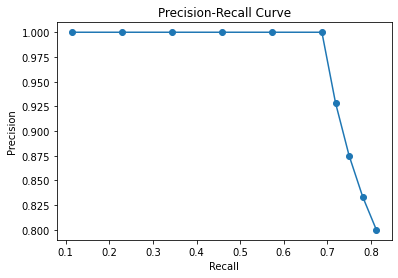

In [68]:

import matplotlib.pyplot as plt
# compute Recall, Precision, F1-measure
def compute_R_P_F1(re_mark, QuRe_ID):
  """
  compute_R_P_F1 function takes two input lists: re_mark, which is a binary list of whether
  each query was correctly answered or not, and QuRe_ID, which is a list of query ids. The
  function calculates the Recall, Precision, and F1 scores at each point while iterating
  over the re_mark list. The function returns a tuple of three lists containing Recall,
  Precision, and F1 scores at each point.

  :param re_mark: a binary list of whether each query was correctly answered or not
  :param QuRe_ID: a list of query ids
  :return: a tuple containing three lists, Recall, Precision, and F1 scores at each point
  """
  Recall = []
  Precision = []
  F1measure = []
  for i in range(len(re_mark)):
    r = sum(re_mark[:(i+1)])
    #print(r)
    Re = r/(len(QuRe_ID))
    Pr = r/(i+1)
    #print(Pr)   
    # avoid divisor to be 0
    FD = Re + Pr 
    if FD == 0:
      FD=1
    F1 = 2*Re*Pr/FD

    Recall.append(Re)
    Precision.append(Pr)
    F1measure.append(F1)
  return Recall, Precision, F1measure

#######################################################
#######################################################

Xtrain =  prepare_data(train_docs, highest[2], vocab)

trunc_SVD_model = TruncatedSVD(n_components=highest[1])
approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)

AllRecall = []
AllPrecision = []
AllF1measure = []
# loop queries
j = 0
for j in range(len(Query)):
  # retrieval
  encoded_query = preprocess_query(Query[j], 'tfidf', vocab)
  transformed_query = trunc_SVD_model.transform(encoded_query)
  similarities = cosine_similarity(approx_Xtrain, transformed_query)

  # rank the index
  Indexes = np.argsort(similarities.flat)[::-1]
  indexes = index2ID1D(Indexes)
  #print(indexes)
  #print(data_array[j])
  # Mark the relevant index
  re_mark = []
  for i in range(len(indexes)):
    if (indexes[i]) in data_array[j]:
      re_mark.append(1)
    else:
      re_mark.append(0)
  # print(re_mark)

  # compute Recall, Precision, F1-measure
  Recall, Precision, F1measure = compute_R_P_F1(re_mark=re_mark, QuRe_ID=data_array[j])
  
  #for i in range(10):
    #print("Top " + str(i+1) + ' result: ID%d '%(Indexes[i]), ArRe_train_lines[Indexes[i]])
  Recall = np.array(Recall)
  Precision = np.array(Precision)
  F1measure = np.array(F1measure)

  # save
  AllRecall.append(Recall)
  AllPrecision.append(Precision)
  AllF1measure.append(F1measure)

  j += 1

# compute average Recall, average Precision, average F1-measure
AllRecall = np.array(AllRecall)
AllPrecision = np.array(AllPrecision)
AllF1measure = np.array(AllF1measure)
AveRecall = (AllRecall[0] + AllRecall[1])/2
AvePrecision = (AllPrecision[0] + AllPrecision[1])/2
AveF1measure = (AllF1measure[0] + AllF1measure[1])/2

print("\nAverage Recall, average Precision, average F1-measure: ")
print("average Recall@1~10: ", np.around(AveRecall[:10],2))
print("average Precision@1~10: ", np.around(AvePrecision[:10],2))
print("average F1measure@1~10: ", np.around(AveF1measure[:10],2))

# plot average R/P curve
# plotting the precision-recall curve
plt.plot(AveRecall, AvePrecision, '-o')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# title
plt.title('Precision-Recall Curve')

# show the plot
plt.show()
#####################################################################
#####################################################################

Block below shows the result for second best tuned model.


Average Recall, average Precision, average F1-measure: 
average Recall@1~10:  [0.11 0.23 0.34 0.46 0.57 0.69 0.72 0.75 0.78 0.81]
average Precision@1~10:  [1.   1.   1.   1.   1.   1.   0.93 0.88 0.83 0.8 ]
average F1measure@1~10:  [0.2  0.36 0.49 0.6  0.69 0.77 0.77 0.76 0.76 0.76]


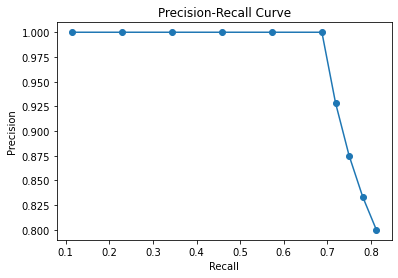

In [69]:
Xtrain =  prepare_data(train_docs, second_highest[2], vocab)

trunc_SVD_model = TruncatedSVD(n_components=second_highest[1])
approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)

AllRecall = []
AllPrecision = []
AllF1measure = []
# loop queries
j = 0
for j in range(len(Query)):
  # retrieval
  encoded_query = preprocess_query(Query[j], 'tfidf', vocab)
  transformed_query = trunc_SVD_model.transform(encoded_query)
  similarities = cosine_similarity(approx_Xtrain, transformed_query)

  # rank the index
  Indexes = np.argsort(similarities.flat)[::-1]
  indexes = index2ID1D(Indexes)
  #print(indexes)
  #print(data_array[j])
  # Mark the relevant index
  re_mark = []
  for i in range(len(indexes)):
    if (indexes[i]) in data_array[j]:
      re_mark.append(1)
    else:
      re_mark.append(0)
  # print(re_mark)

  # compute Recall, Precision, F1-measure
  Recall, Precision, F1measure = compute_R_P_F1(re_mark=re_mark, QuRe_ID=data_array[j])
  
  #for i in range(10):
    #print("Top " + str(i+1) + ' result: ID%d '%(Indexes[i]), ArRe_train_lines[Indexes[i]])
  Recall = np.array(Recall)
  Precision = np.array(Precision)
  F1measure = np.array(F1measure)

  # save
  AllRecall.append(Recall)
  AllPrecision.append(Precision)
  AllF1measure.append(F1measure)

  j += 1

# compute average Recall, average Precision, average F1-measure
AllRecall = np.array(AllRecall)
AllPrecision = np.array(AllPrecision)
AllF1measure = np.array(AllF1measure)
AveRecall = (AllRecall[0] + AllRecall[1])/2
AvePrecision = (AllPrecision[0] + AllPrecision[1])/2
AveF1measure = (AllF1measure[0] + AllF1measure[1])/2

print("\nAverage Recall, average Precision, average F1-measure: ")
print("average Recall@1~10: ", np.around(AveRecall[:10],2))
print("average Precision@1~10: ", np.around(AvePrecision[:10],2))
print("average F1measure@1~10: ", np.around(AveF1measure[:10],2))

# plot average R/P curve
# plotting the precision-recall curve
plt.plot(AveRecall, AvePrecision, '-o')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# title
plt.title('Precision-Recall Curve')

# show the plot
plt.show()
#####################################################################
#####################################################################

# Task 3
## Neural information retrieval


### 3a) Develop a neural information retrieval model (5 marks). Compare its performance to that of your best-tuned LSI model (from Task 2). Present all results in tables and graphs and explain the findings (max 100 words) (10 marks)

For this task I took massive Help from 
https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1
and 
https://www.sbert.net/docs/pretrained_models.html

In [70]:
test_docs = process_docs(Query) # Preprocess all the queries and put them into a variable called test_docs 

In [71]:
!pip install --quiet sentence_transformers   # Install Sentence Transformers. This partiular gave me a sleepless night :)

In [72]:
from sentence_transformers import SentenceTransformer          # Import SentenceTransformer 
model = SentenceTransformer('all-mpnet-base-v2') # I am using a pretrained model all-mpnet-base-v2. The other models especially BERT yielded poor results. :(

In [73]:
sentence_embeddings = model.encode(train_docs)  # Encode preprocessed reviews

In [74]:
sentence_embeddings.shape  # Look at the shape

(204, 768)

In [75]:
top_indexes=[]
indexestemp=[]

for query in Query:
  # retrieval
  Query_embeddings = model.encode(query) #embed queries one by one
  similarities=cosine_similarity( sentence_embeddings,[Query_embeddings]) # Find similarity
  Top_n_reviews=10  # We are taking only top 10 reviews
  indexes = np.argsort(similarities.flat)[::-1]   # Flaten the similarity table
  top_indexes=[]
  for i in range(Top_n_reviews):    # extract top 10 and put them in a array so that we get the output we have
    top_indexes.append(indexes[i])
  indexestemp.append(top_indexes)

In [76]:
queryValstemp=index2ID(indexestemp)  # Again convert indexes to IDs

In [77]:
score=precision(queryValstemp)  # Calculate the precision for Neural Model
score

50.0

At this point I would love to point out that I used 2 to 3 different types of BERT all gave me around 20%. This model seems to be working best.


Average Recall, average Precision, average F1-measure: 
average Recall@1~10:  [0.11 0.23 0.34 0.46 0.54 0.62 0.62 0.62 0.62 0.66]
average Precision@1~10:  [1.   1.   1.   1.   0.9  0.83 0.71 0.62 0.56 0.55]
average F1measure@1~10:  [0.2  0.36 0.49 0.6  0.65 0.68 0.64 0.6  0.56 0.57]


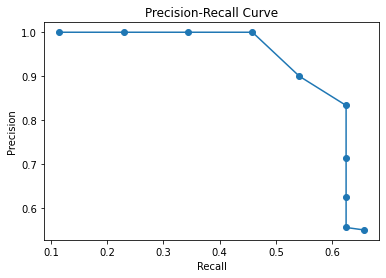

In [78]:
import numpy as np
import matplotlib.pyplot as plt
AllRecall = []
AllPrecision = []
AllF1measure = []


for j in range(len(Query)) :
  # retrieval
  Query_embeddings = model.encode(Query[j]) # Embed queries one by one
  similarities=cosine_similarity(sentence_embeddings, [Query_embeddings]) # Find the similarity

  Indexes = np.argsort(similarities.flat)[::-1] # Flaten Though I dont think we need this.
  indexes = index2ID1D(Indexes)   # Remember we said earlier we'll access this function later on.
  # Mark the relevant index
  re_mark = []
  for i in range(len(indexes)):
    if (indexes[i]) in data_array[j]:
      re_mark.append(1)
    else:
      re_mark.append(0)
  # print(re_mark)

  # compute Recall, Precision, F1-measure
  Recall, Precision, F1measure = compute_R_P_F1(re_mark=re_mark, QuRe_ID=data_array[j])
  
  Recall = np.array(Recall)
  Precision = np.array(Precision)
  F1measure = np.array(F1measure)
  # save
  AllRecall.append(Recall)
  AllPrecision.append(Precision)
  AllF1measure.append(F1measure)

  j += 1

# compute average Recall, average Precision, average F1-measure
AllRecall = np.array(AllRecall)
AllPrecision = np.array(AllPrecision)
AllF1measure = np.array(AllF1measure)
AveRecall = (AllRecall[0] + AllRecall[1])/2
AvePrecision = (AllPrecision[0] + AllPrecision[1])/2
AveF1measure = (AllF1measure[0] + AllF1measure[1])/2

print("\nAverage Recall, average Precision, average F1-measure: ")
print("average Recall@1~10: ", np.around(AveRecall[:10],2))
print("average Precision@1~10: ", np.around(AvePrecision[:10],2))
print("average F1measure@1~10: ", np.around(AveF1measure[:10],2))

# plot average R/P curve
# plotting the precision-recall curve
plt.plot(AveRecall, AvePrecision, '-o')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# title
plt.title('Precision-Recall Curve')

# show the plot
plt.show()
#####################################################################
#####################################################################

So now lets do some talking. We see out neural model gives us less precision score than our best tuned LSI model. Our best tuned LSI gives us 70% while this neural only gives 50 at best. one potential reason why a neural model may give less precision than LSI is that neural models are generally more complex and require more data to train effectively. This means that if the amount of available data is limited, the neural model may not be able to learn as effectively as LSI.

In addition, LSI is a linear algebra-based method that reduces the dimensionality of a large matrix of word frequencies, while neural models typically use more complex architectures that involve many layers of non-linear transformations. This can make neural models more prone to overfitting, which occurs when the model learns to fit the training data too closely and does not generalize well to new data.

### 3b) Develop an interactive interface that will allow the user to type in their own query (5 marks) and to interact withthe results (10 marks).

In [79]:
import ipywidgets as widgets
user_input='I just love the ring' # Use the global variable JUST A PLACEHOLDER
# Create a text box widget
text_box = widgets.Text(
    placeholder='Type something',
    description='Input:',
    disabled=False
)

# Create a submit button widget
button = widgets.Button(description='Submit')

# Create a text output widget
output = widgets.Output()



# Define a callback function for the submit button
def on_button_clicked(button):
 # Use the global variable
    with output:
        # Clear the output widget
        output.clear_output()
        # Get the user input from the text box
        user_input = str(text_box.value)
        # Print the user input
        print('User input:', user_input)

# Link the button to the callback function
button.on_click(on_button_clicked)
print('Enter a query of your choice. And see the reviews relevent to it')
# Display the widgets
display(text_box)
display(button)
display(output)

# Use the user input later in the code
#print('User input:', user_input.upper())

Enter a query of your choice. And see the reviews relevent to it


Text(value='', description='Input:', placeholder='Type something')

Button(description='Submit', style=ButtonStyle())

Output()

In [80]:
### Get index of reviews similar to the query the user entered
top_indexes=[]
indexestemp=[]
  # retrieval
Query_embeddings = model.encode(user_input) #embed User Entered Query
similarities=cosine_similarity( sentence_embeddings,[Query_embeddings]) # Find similarity
Top_n_reviews=10  # We are taking only top 10 reviews
indexes = np.argsort(similarities.flat)[::-1]   # Flaten the similarity table
top_indexes=[]
for i in range(Top_n_reviews):    # extract top 10 and put them in a array so that we get the output we have
  top_indexes.append(indexes[i])
indexestemp.append(top_indexes)
indexestemp = [item for sublist in indexestemp for item in sublist] # Flaten convert 2D to 1D
for i in range(len(indexestemp)):  # This is just here incase user enters something totally irrelevant
    if indexestemp[i] > 200:
        indexestemp[i] = 200

indexestemp

[52, 88, 9, 104, 49, 51, 53, 21, 92, 77]

In [81]:
import ipywidgets as widgets
from IPython.display import display
options=0
# Define a dropdown menu widget with options "1" and "2"
number_select = widgets.Dropdown(
    options=["Indexes", "Acutal Reviews"],
    value="Indexes",
    description="Select an option:",
    disabled=False,
)

# Define a text widget to display the output
output_text = widgets.HTML(
    value="",
)

# Define a callback function for the dropdown menu
def on_number_select(change):
    # Get the selected option from the dropdown menu
    selected_option = change.new
    
    # Execute different actions based on the selected option
    if selected_option == "Indexes":
        queryValstemp=index2ID1D(indexestemp)
        for val in queryValstemp:
          print('ID ', val)
    elif selected_option == "Acutal Reviews":
        queryValstemp=index2Review1D(indexestemp)
        for val in queryValstemp:
          print('Review ', val)
    else:
        output_text.value = "Invalid option selected."
    
# Link the dropdown menu to the callback function
number_select.observe(on_number_select, names="value")

# Display the widgets
display(number_select)
display(output_text)

  


Dropdown(description='Select an option:', options=('Indexes', 'Acutal Reviews'), value='Indexes')

HTML(value='')

# TASK 4
## Topic modelling and visualisation of search results.

For this particular task I took help from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

### 4a) Extend your answer to Task 3 to include topic modelling functionality. For this, implement and tune a topic modelof your choice (e.g. Latent Dirichlet Allocation (LDA), Gensim, BERTopic) that, takes the top n search results and clusters them into topics (n can be user-defined or set to 50) (10 marks). Evaluate the performance of the model using suitable evaluation metrics, and explain the findings (max 100 words) (5 marks).

First off we'll run the same code as Q3 but insted of 10 we'll retrieve 50 reviews.

In [82]:
top_indexes=[]
indexestemp=[]

for query in Query:
  # retrieval
  Query_embeddings = model.encode(query) #embed queries one by one
  similarities=cosine_similarity( sentence_embeddings,[Query_embeddings]) # Find similarity
  Top_n_reviews=50  # We are taking only top 10 reviews
  indexes = np.argsort(similarities.flat)[::-1]   # Flaten the similarity table
  top_indexes=[]
  for i in range(Top_n_reviews):    # extract top 10 and put them in a array so that we get the output we have
    top_indexes.append(indexes[i])
  indexestemp.append(top_indexes)

In [83]:
queryRevstemp=index2Review(indexestemp)

Choose any one query for evaluation and all.

In [84]:
import ipywidgets as widgets
from IPython.display import display
data= queryRevstemp[3]
# Define a dropdown menu widget with options "1" and "2"
number_select = widgets.Dropdown(
    options=["1", "2","3", "4","5", "6","7", "8"],
    value="1",
    description="Select an Query:",
    disabled=False,
)

# Define a text widget to display the output
output_text = widgets.HTML(
    value="",
)

# Define a callback function for the dropdown menu
def on_number_select(change):
    # Get the selected option from the dropdown menu
    selected_option = change.new
    global data
    # Execute different actions based on the selected option
    if selected_option == "1":
        data = queryRevstemp[0]
    elif selected_option == "2":
        data = queryRevstemp[1]
    elif selected_option == "3":
        data = queryRevstemp[2]
    elif selected_option == "4":
        data = queryRevstemp[3]
    elif selected_option == "5":
        data = queryRevstemp[4]
    elif selected_option == "6":
        data = queryRevstemp[5]
    elif selected_option == "7":
        data = queryRevstemp[6]
    elif selected_option == "8":
        data = queryRevstemp[7]
    else:
        output_text.value = "Invalid option selected."
    
# Link the dropdown menu to the callback function
number_select.observe(on_number_select, names="value")

# Display the widgets
display(number_select)
display(output_text)

Dropdown(description='Select an Query:', options=('1', '2', '3', '4', '5', '6', '7', '8'), value='1')

HTML(value='')

Here is a beautiful Word Cloud

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


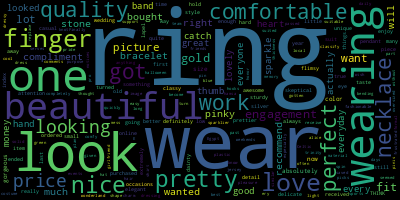

In [85]:
#### Copied from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# Import the wordcloud library
from wordcloud import WordCloud        
# Join the different processed titles together.
long_string = ','.join(list(data))
# Create a WordCloud object
wordcloud = WordCloud(background_color="Black", max_words=1000, contour_width=20, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [86]:
!pip install --quiet pyLDAvis  # Install pyLDAvis

Here you may think we are preprocessing the data again but no. Its Raw data that we are trying to process again.



In [87]:
#### Copied from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
#data = queryRevstemp[0]
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['lapel', 'pin', 'perfect', 'detail', 'wear', 'colors', 'plan', 'wear', 'lapel', 'wear', 'suit', 'pinis', 'nice', 'enough', 'wear', 'formal', 'occasions', 'wear', 'pride']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
## Copied from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 5)]


In [89]:
## Copied from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

In [90]:
from gensim.models.coherencemodel import CoherenceModel
from tabulate import tabulate
# Calculate the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# Create a list of topic keywords and probabilities
topic_keywords = []
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    topic_keywords.append(', '.join([word for word, prob in topic]))

# Create a list of topic keywords and probabilities
topic_keywords = []
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    topic_keywords.append([word for word, prob in topic])

# Add the coherence score as a row in the topic keywords list
topic_keywords.append(['Coherence Score: {}'.format(round(coherence_lda, 4))])

# Display the topic keywords in a table format using the tabulate library
headers = ['Topic {}'.format(i) for i in range(1, num_topics+1)]
print(tabulate(topic_keywords, headers=headers))

Topic 1                  Topic 2     Topic 3    Topic 4    Topic 5    Topic 6     Topic 7    Topic 8    Topic 9      Topic 10
-----------------------  ----------  ---------  ---------  ---------  ----------  ---------  ---------  -----------  -----------
ring                     beautiful   look       wear       band       one         pretty     everyone   hand         turned
wearing                  classy      work       pinky      ring       wanted      found      hand       looking      gold
ring                     wear        would      love       thumb      gold        much       gorgeous   wanted       wearing
look                     beautiful   wearing    necklace   money      looking     every      delicate   simple       pretty
wear                     like        got        hard       look       good        quality    picture    silver       completely
wear                     wearing     perfect    item       elegant    enough      dress      still      compliments  daily

A coherence score of 0.3704 suggests that the topics generated by the LDA model are somewhat coherent, but may require further refinement or optimization. It is important to note that the coherence score alone is not sufficient to evaluate the quality of a topic model, and should be used in conjunction with other evaluation metrics, such as human judgement or domain-specific relevance measures. Additionally, coherence score can be influenced by the number of topics, the size and quality of the corpus, and the hyperparameters of the LDA model, among other factors.

### Add functionality that will enable the user to interactively visualise the topics and keywords (15 marks)

In [91]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# set the lambda parameter for the visualization
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# display the visualization with a fixed size
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# TASK 5
## Summarisation of search results

### 5a) Extend your answer to Task 3 to include an approach (either neural or non-neural) that takes the top 10 search results and summarises them (5 marks). Evaluate the performance of the model using suitable evaluation metrics. Explain the findings (max 100 words) (5 marks).

In [92]:
top_indexes=[]
indexestemp=[]
## JUST RUNNING Q3 AGAIN :)
for query in Query:
  # retrieval
  Query_embeddings = model.encode(query) #embed queries one by one
  similarities=cosine_similarity( sentence_embeddings,[Query_embeddings]) # Find similarity
  Top_n_reviews=10  # We are taking only top 10 reviews
  indexes = np.argsort(similarities.flat)[::-1]   # Flaten the similarity table
  top_indexes=[]
  for i in range(Top_n_reviews):    # extract top 10 and put them in a array so that we get the output we have
    top_indexes.append(indexes[i])
  indexestemp.append(top_indexes)

In [93]:
queryRevstemp=index2Review(indexestemp) # Just calling the functions and getting reviews from indexes.

THE MOST TEDIOUS PART. INSTALLING SUMMERTIME

In [94]:
# Download SummerTime 
# Swith to the Summertime directory

!git clone https://github.com/Yale-LILY/SummerTime.git

Cloning into 'SummerTime'...
remote: Enumerating objects: 4385, done.
remote: Counting objects: 100% (690/690), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 4385 (delta 598), reused 498 (delta 498), pack-reused 3695
Receiving objects: 100% (4385/4385), 9.84 MiB | 13.51 MiB/s, done.
Resolving deltas: 100% (2407/2407), done.


In [95]:
%cd SummerTime/

/content/SummerTime/SummerTime


In [96]:
!pip --quiet install -e .

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 2.2.2 requires huggingface-hub>=0.4.0, but you have huggingface-hub 0.0.19 which is incompatible.
sentence-transformers 2.2.2 requires transformers<5.0.0,>=4.6.0, but you have transformers 4.5.1 which is incompatible.


In [97]:
## Finish setup

# Setup ROUGE (needed to use ROUGE evaluation metric)
!export ROUGE_HOME=/usr/local/bin/python/dist-packages/summ_eval/ROUGE-1.5.5/
!pip install -U  git+https://github.com/bheinzerling/pyrouge.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/bheinzerling/pyrouge.git to /tmp/pip-req-build-qpscmzs4
  Running command git clone --filter=blob:none --quiet https://github.com/bheinzerling/pyrouge.git /tmp/pip-req-build-qpscmzs4
  Resolved https://github.com/bheinzerling/pyrouge.git to commit 08e9cc35d713f718a05b02bf3bb2e29947d436ce
  Preparing metadata (setup.py) ... done


In [98]:
# import modules for this notebook

from pprint import pprint
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
# !pip install en_core_web_sm==3.0.0
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-17 02:46:06.147226: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 02:46:06.147335: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 02:46:06.147354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [100]:
!pip  install --upgrade transformers   #Upgrade transformers without this there were 100s of errors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.27.1-py3-none-any.whl (6.7 MB)
  Using cached huggingface_hub-0.13.2-py3-none-any.whl (199 kB)
  Using cached tokenizers-0.13.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.19
    Uninstalling huggingface-hub-0.0.19:
      Successfully uninstalled huggingface-hub-0.0.19
  Attempting uninstall: transformers
    Found existing installation: transformers 4.5.1
    Uninstalling transformers-4.5.1:
      Successfully uninstalled transformers-4.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of 

Now we make corpus. Which is basically results of top 10 relevent queires obtained by Neural Network.

In [101]:
corpus = queryRevstemp

In [102]:
##########################################
##########################################
from summertime.evaluation import SUPPORTED_EVALUATION_METRICS # Import the necessary libraries and evaluation metrics
import summertime.evaluation as st_eval
bert_eval = st_eval.BertScore()
from summertime import dataset, model
from pprint import pprint
from summertime.evaluation import BertScore
from summertime.evaluation import Meteor
from summertime.evaluation import Bleu
# Define the targets for evaluation
# All the summaries were taken from CHATGPT
targets = ['Feedback on various products, ranging from jewelry to a diamond ring. Some customers express satisfaction with their purchases, such as a Baby Blue Topaz Cluster Ring that received numerous compliments and looks like the picture. On the other hand, some customers report disappointment with their purchases, such as a misleading picture of a ring with small diamonds or silver beads that look like pearls. Additionally, customers comment on the quality and price of their purchases, with some expressing contentment with the price and others remarking on the color and shine of the jewelry. Overall, these reviews provide valuable insights into the range of experiences customers can have when buying jewelry online.',
           'Some customers disappointed by the small size of the diamonds and others pleased with its appearance for the price. However, several customers received rings with missing or damaged diamonds, leading to negative reviews and returns.',
           'Some customers are extremely satisfied with their purchases, noting the meticulous craftsmanship, beautiful design, and excellent value for the price. Others express disappointment with the color of the product not matching the online image or the size of the diamonds being smaller than expected. Despite these differences in opinion, most customers agree that the products are well-made and beautiful to look at, and would recommend them to others.',
           'Common issues that customers have encountered when shopping online, including inaccurate product descriptions, poor quality items, and missing or damaged components. In some cases, customers were pleased with the response from the seller or retailer when they reached out to report an issue, while in other cases they felt ignored or dissatisfied with the outcome. Its important to read product descriptions carefully and to check customer reviews before making a purchase, and to reach out to the seller or retailer if there are any concerns or problems with the item received.',
           'Covers a range of products, from lapel pins and pendants to earrings and rings. While some customers were pleased with the quality and style of the items, others found them disappointing and lacking in quality. The lapel pin and pendant received positive reviews, with customers stating they were perfect for formal and casual occasions, respectively. The earrings were described as comfortable and suitable for everyday wear or dressing up. However, one customer found the earrings to be of poor quality, while another found the pendant less sparkly than expected. The ring was praised for its comfort and Celtic design, but some customers experienced issues with missing or scratched diamonds. Overall, the reviews suggest that while some customers were satisfied with their purchases, others found them lacking in quality or not as described.',
           'Overall, customers are generally satisfied with the quality of the products they received and the prompt delivery. Some customers even express their willingness to buy from the same seller again. However, there is also a complaint about slow shipping, which may deter some customers from ordering from the same seller in the future. Nevertheless, the majority of the feedback is positive, with customers being happy with the quality of the items and the delivery speed.',
           'Disappointment in the quality of various jewelry items, including bracelets and rings. Common issues mentioned include poor craftsmanship, fragile clasps, missing diamonds, and cloudy or pale gemstones. Some reviewers also mention that the items were not true to length or color as advertised. Overall, these reviews advise against purchasing these particular jewelry items.',
           'The first set of reviews are critical of the poor quality of several jewelry items, including a bracelet and a ring, with complaints about poor craftsmanship, missing diamonds, and faulty clasps. The second set of reviews are positive, with customers praising the sparkle and quality of a ring that is also affordable, making it a great gift for someone on a budget. One customer notes that the ring has a solid band that is not flimsy like other similar rings, while another mentions that it is a beautiful and eye-catching piece of jewelry that does not look cheap. However, one negative review warns potential buyers that the diamonds on the ring are small, and suggests spending more money on a better-looking ring.']
##########################################
##########################################
# Initialize a counter variable i and an empty list belu
i=0;
belu=[]
# Iterate through each corpus
for cor in corpus:
  # Create a LexRankModel object for the current corpus
  lexrank = model.LexRankModel(cor)
  # Generate a summary using the LexRank algorithm
  # Inference
  summary = lexrank.summarize(cor)
  summaries = summary
  # Calculate BleuScore
  bleu_metric = Bleu()
  bleu_score=bleu_metric.evaluate(summaries, targets)
  bleu_score = bleu_score['bleu']
  # Append the BleuScore to the belu list
  belu.append(bleu_score)
# Print the belu list containing the BleuScores for all the generated summaries
print(belu)

[0.0010645607150661872, 0.0012767979030590415, 0.00029319218781732756, 0.0002913608665129478, 0.0009675667323367206, 0.00015706770040421696, 0.0015016085394157347, 0.00442005893087656]


The BLEU scores represent the similarity between the summaries generated by the LexRank summarization model and the target summaries provided for each of the 8 queries. The scores range from 0 to 1, with a higher score indicating greater similarity to the target summary.

In this case, the BLEU scores are relatively low, with all of them below 0.01. This suggests that the summaries generated by the LexRank model are not very similar to the target summaries, indicating that the model may not be effectively summarizing the relevant information from the query results.

Further analysis and experimentation would be needed to determine the cause of the low BLEU scores and improve the performance of the summarization model. This is mainly because of poor summarization on ChatGPT's side

Now we put everthing in a graph.

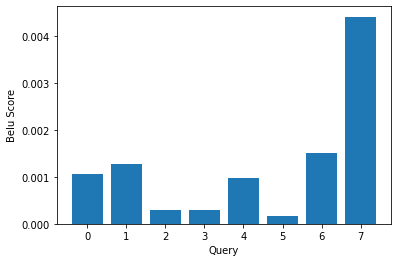

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the bar graph
plt.bar(range(len(belu)), belu)
plt.xlabel('Query')
plt.ylabel('Belu Score')
plt.show()

### 5b) Add extra functionality of your choice that is related to summarisation (e.g. enable the user to choose which results to summarise) (10 marks).

In [104]:
Corp1D = [num for row in corpus for num in row] # Take 2D corpus and convert into 1D

In [105]:
# Global variable to store selected result
selected_result = 'I love the product, very simple yet elegent. Seems very expensive when its not'

# Create a dropdown widget to display the results
dropdown = widgets.Dropdown(options=Corp1D, description='Results: ')

# Define a function to update the selected result
def on_value_change(change):
    global selected_result
    selected_result = change.new

# Set the on_value_change function to be called when the dropdown value changes
dropdown.observe(on_value_change, names='value')

print('Please select a option and run next block to see its summary.')
# Display the dropdown widget
display(dropdown)




Please select a option and run next block to see its summary.


Dropdown(description='Results: ', options=('This ring has such a good sparkle and it looks like a ring that sh…

In [106]:
lexrank = model.LexRankModel(Corp1D)

 # Inference
summary = lexrank.summarize([selected_result])
for i in range(len(summary)):
  print("Summary Review %d: "%(i+1), summary[i])

Summary Review 1:  Seems very expensive when its not I love the product, very simple yet elegent.


# Submission information

In [111]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-plain-generic is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [114]:
!jupyter nbconvert --to pdf '/content/drive/My Drive/Colab Notebooks/F220102_22COP509_Coursework.ipynb' 

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/F220102_22COP509_Coursework.ipynb to pdf
[NbConvertApp] Support files will be in F220102_22COP509_Coursework_files/
[NbConvertApp] Making directory ./F220102_22COP509_Coursework_files
[NbConvertApp] Making directory ./F220102_22COP509_Coursework_files
[NbConvertApp] Making directory ./F220102_22COP509_Coursework_files
[NbConvertApp] Making directory ./F220102_22COP509_Coursework_files
[NbConvertApp] Making directory ./F220102_22COP509_Coursework_files
[NbConvertApp] Writing 197062 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 270397 bytes to /content/drive/My Drive/Colab Notebooks/F220102_22COP509_Coursework.pdf
